In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import koreanize_matplotlib

np.random.seed(0)
%precision 3
%matplotlib inline

In [4]:
# 5.2절에서 이산형 확률변수를 다룰 때 사용한 함수 준비 
linestyles = ['-', '--', ':', '-.']

def E(XY, g):
    x_set, y_set, f_XY = XY
    return np.sum([g(x_i, y_j) * f_XY(x_i, y_j)
                   for x_i in x_set for y_j in y_set])

def Cov(XY):
    x_set, y_set, f_XY = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    return np.sum([(x_i-mean_X) * (y_j-mean_Y) * f_XY(x_i, y_j)
                    for x_i in x_set for y_j in y_set])

def f_X(x):
    return np.sum([f_XY(x, y_k) for y_k in y_set])

def f_Y(y):
    return np.sum([f_XY(x_k, y) for x_k in x_set])

# 9.1 확률변수의 독립성
: 2개 이상의 확률변수가 서로 영향을 끼치지 않으며 관계가 없음을 나타내는 개념  
>n개의 확률변수 $X_1, X_2, ..., X_n$이 다음을 만족할 때,  $X_1, X_2, ..., X_n$을 서로 독립이라고 함
>  
>$f_{X_1, X_2, ..., X_n}(x_1, x_2, ..., x_n) = f_{X_1}(x_1)f_{X_2}(x_2)...f_{X_n}(x_n)$
>
>함수 $f$가 이산형이면 확률함수, 연속형이면 밀도함수를 나타냄

## 9.1.2 독립성과 무상관성
: 공분산이나 상관계수가 0일 때 = 무상관 -> 두 확률변수 사이에 선형관계가 없음!!
-> 독립성이 무상관성보다 더 더 더 더 강한 개념
- 독립 -> 무상관 O
- 무상관 -> 반드시 독립X

In [5]:
x_set = np.array([1, 2, 3, 4, 5, 6])
y_set = np.array([1, 2, 3, 4, 5, 6])

def f_XY(x, y):
    if x in x_set and y in y_set:
        return x * y / 441
    else:
        return 0
    
XY = [x_set, y_set, f_XY]

In [6]:
Cov(XY)

-0.000

In [7]:
x_set = np.array([0, 1])
y_set = np.array([-1, 0, 1])

def f_XY(x, y):
    if (x, y) in [(0, 0), (1, 1), (1, -1)]:
        return 1 / 3
    else:
        return 0
    
XY = [x_set, y_set, f_XY]

In [8]:
Cov(XY)

0.000

In [9]:
f_X(0) * f_Y(0), f_XY(0, 0)

(0.111, 0.333)

# 9.2 합의 분포
: 해당 절에서 다루는 합의 분포는 서로 독립이고 동일한 확률분포를 따르는 확률변수 $X_1, X_2, ..., X_n$의 합 $\sum_{i=1}^{n}X_i = X_1 + X_2 + ... + X_n$이 따르는 확률분포를 의미

__확률변수 합의 기댓값__  
>확률변수 $X_1, X_2, ..., X_n$에 관해서
>
>$E(X_1 + X_2 + ... + X_n) = E(X_1) + E(X_2) + .. + E(X_n)$
>
>이 성립(독립 아니어도 OK)

__확률변수 합의 분산__  
>확률변수 $X_1, X_2, ..., X_n$이 서로 __독립__ 이라면
>
>$V(X_1 + X_2 + ... + X_n) = V(X_1) + V(X_2) + .. + V(X_n)$
>
>이 성립(독립!!!!필수)

## 9.2.1 정규분포의 합의 분포
서로 독립인 두 확률변수 $X \sim N(1,2)$와 $Y\sim N(2,3)$  
위의 공식을 활용하면, 
- 기댓값 : 1 + 2 = __3__
- 분산 : 2 + 3 = __5__

In [10]:
rv1 = stats.norm(1, np.sqrt(2))
rv2 = stats.norm(2, np.sqrt(3))

sample_size = int(1e6)
X_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)

sum_sample = X_sample + Y_sample

np.mean(sum_sample), np.var(sum_sample) # 공식대로는 3, 5가 나와야함 

(3.003, 4.996)

-> 표본 크기를 키우면 이론값에 수렴하게 됨!!  
- 재생성 : 동일한 분포를 따르는 2개의 독립인 확률변수에 대해서, 그 합도 동일한 확률분포가 되는 성질(모든 확률분포가 그런 것은 x)

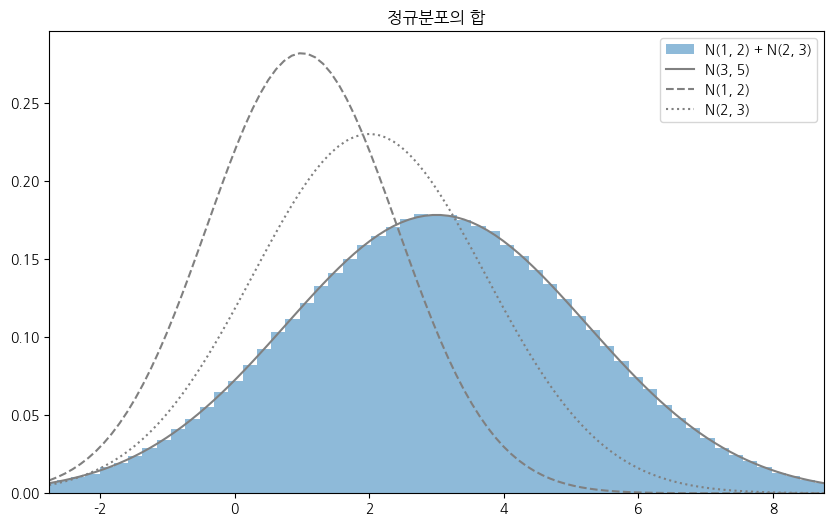

In [12]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv = stats.norm(3, np.sqrt(5))
xs = np.linspace(rv.isf(0.995), rv.isf(0.005), 100)

ax.hist(sum_sample, bins=100, density=True,
        alpha=0.5, label='N(1, 2) + N(2, 3)')
ax.plot(xs, rv.pdf(xs), label='N(3, 5)', color='gray')
ax.plot(xs, rv1.pdf(xs), label='N(1, 2)', ls='--', color='gray')
ax.plot(xs, rv2.pdf(xs), label='N(2, 3)', ls=':', color='gray' )

ax.legend()
ax.set_xlim(rv.isf(0.995), rv.isf(0.005))
plt.title("정규분포의 합")
plt.show()

# 9.3 표본평균의 분포